# Assignment 02- Analyzing and Understanding the Data

The purpose of this document is to analyse and parse the data to understand exactly how and what our problem will be with the subjective dataset. Keep in mind the technique used in the Weight matrix vs Neuron Behaviour. (pruning)
______

### TODO:

    1. Explore temperature. Does it remain relatively consistent.
    2. Explore the other ones but we dont really pose any questions
    3. retrieve mean and standard deviation for participants. Label by video and output into a table. This will be in the report.

______

In [2]:
#IMPORTS:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Visualization Imports
import matplotlib.pyplot as plt

### Training - Testing - Data Analysis: Approach

We extract the y of the dataset. The overall subjective belief for each presenter. From here we fetch the timeseries data based on the id. 

Since data is sequential there isn't too much to analyze outside of some means, standard deviations, and examples of each variable. For the report you will be able to output the size of the data during training. 

for temperature input the average of the time. Because we shouldn't see too much increase however we'll do some exploration on that.

From the report on the data we know that the sr for pupillary data was 60hz

We aim to make all features = in size. except for temperature.
______

[1.54033752e+09 1.54033755e+09 1.54033757e+09 1.54033761e+09]


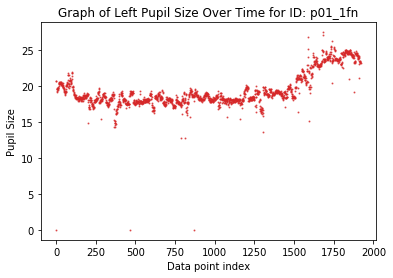

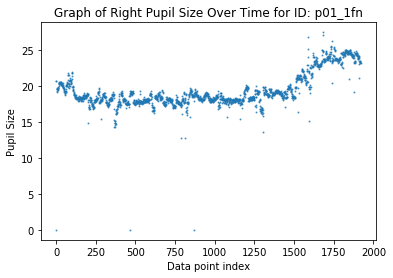

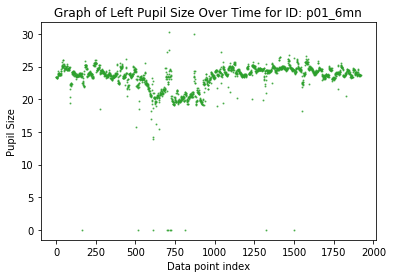

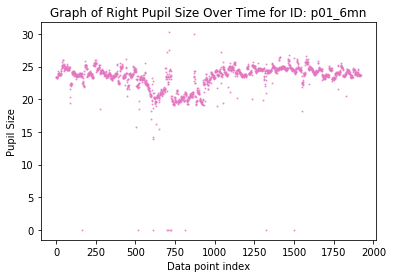

[20, 3127]
[4165, 7549]


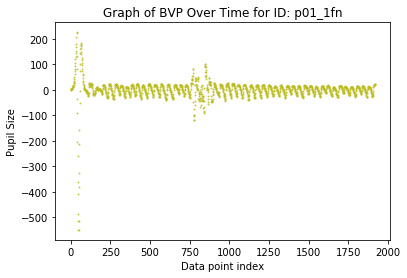

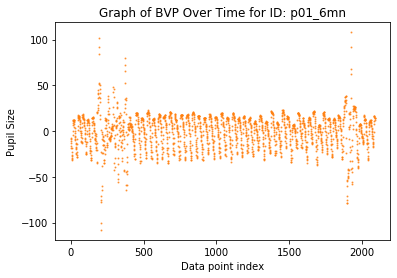

[547, 545, 4027, 8790]
[547, 545, 1920, 1920]


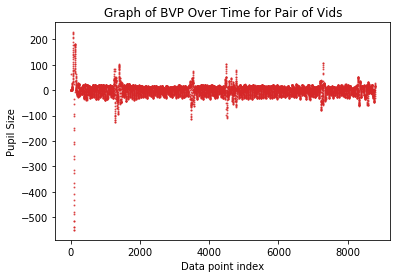

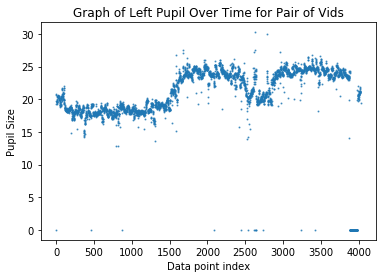

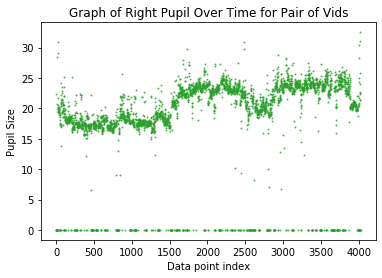

1
1
368


In [3]:
#import Y, including ID so we can match the training order.
Y = pd.read_csv('subjective-belief_v2/TimeseriesObserver/subjective_belief_observers_ts_labels.csv')
cats = ['PUPIL', 'EDA', 'BVP', 'TEMP', 'tags']
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive', 'tab:orange']

def fetch_TS(ID, index, category):
    #Define base pathway
    bp = 'subjective-belief_v2/TimeseriesObserver/raw_observer_physio_data/'
    #fetch outward file
    f1=ID[0:3] + '/'
    #We know that pairs of video data were gathered. So we must take this one and the ID afterwards
    idp1 = Y['pid_vid'][index+1]
    pair = ID[4:] + idp1[4:] + '/'
    return pd.read_csv(bp + f1 + f1[0:3] + '_' + pair + category + '.csv')
    
#PLEASE NOTE INDEXES SHOULD INCREASE BY 2! This will also be included in the assignment. As it is necessary.
#PreProcessing of features should be conducted before training(I.E. Splitting into local features)
def fetch_data(index, output_graph):
    d_sizes = []
    d_sizes_pp = []
    
    id1 = Y['pid_vid'][index]
    Left_Pupil1 = 0 #DEFINE ALL VARIABLES THAT WILL BE RETURNED
    Right_Pupil1 = 0
    BVP1 = 0
    EDA = fetch_TS(Y['pid_vid'][index], index, cats[1])
    Temp = fetch_TS(Y['pid_vid'][index], index, cats[3]) #For now we will take the average temperature across the two videos
    
    d_sizes.append(EDA.shape[0])
    d_sizes.append(Temp.shape[0])
    d_sizes_pp.append(EDA.shape[0])
    d_sizes_pp.append(Temp.shape[0])
    
    id2 = Y['pid_vid'][index+1]
    Left_Pupil2 = 0 #DEFINE ALL VARIABLES THAT WILL BE RETURNED
    Right_Pupil2 = 0
    BVP2 = 0
    #THESE VALUES WILL BE DATAFRAMES. USED IN THIS DOCUMENT FOR GRAPHING AND ANALYSIS
    
    #No matter what we will use the later start time to align the data.
    tags = fetch_tags(fetch_TS(Y['pid_vid'][index], index, cats[4]))
    print(tags)
    
    for x in range(0,len(cats)):
        if cats[x] != 'tags':
            indexed_point = fetch_TS(Y['pid_vid'][index], index, cats[x])
            indices = indexed_point.index.tolist()
            ST = float(indexed_point.columns[0]) #Start time for BVP, EDA, TEMP
            
            si1 = 0
            si2 = int((tags[1] - tags[0])) * 60 #start vid 2-start_time / sr
            
            si1b = 0
            si2b = 0
            if cats[x] == 'PUPIL':
                #Append no preprocessed data size
                d_sizes.append(indexed_point.shape[0])
                v1 = 0
                v2 = 0
                indices1 = []
                indices2 = []
                if float(tags[0]) > ST:
                    v1 = int((float(tags[1]) - float(tags[0]))) * 60
                    v2 = int((float(tags[3]) - float(tags[2]))) * 60
                else:
                    v1 = int((float(tags[1]) - ST)) * 60
                    v2 = int((float(tags[3]) - float(tags[2]))) * 60
                    si1 = int((ST - tags[0]) * 60)
                #FOR THESE NEXT TWO CASES WE FIND THE START INDEX
                if v1 > v2: #If video size is different this helps us
                    #in this case only use v1 sample #'s'
                    indices1 = [int(si1),int((si1+v2))]
                    indices2 = [int(si2),int((si2+v2))]
                else: 
                    #in this case only use v2 sample #'s'
                    indices1 = [int(si1),int((si1+v1))]
                    indices2 = [int(si2),int((si2+v1))]
                indices1 = range(indices1[0], indices1[1])
                indices2 = range(indices2[0], indices2[1])
                
                #APPEND TO EACH RETURN LIST
                Left_Pupil1 = indexed_point.iloc[:,0][list(indices1)]
                Right_Pupil1 = indexed_point.iloc[:,0][list(indices1)]
                Left_Pupil2 = indexed_point.iloc[:,0][list(indices2)]
                Right_Pupil2 = indexed_point.iloc[:,0][list(indices2)]
                
                #APPEND SHAPE SO WE CAN COMPARE ALL SHAPES OF GRAPHS
                d_sizes_pp.append(Left_Pupil1.shape[0])
                
                if output_graph == "true":
                    #CONSTRUCT GRAPHS
                    plt.scatter(range(0,Left_Pupil1.shape[0]), Left_Pupil1, s=1, alpha=0.7, color=colors[0])
                    plt.xlabel('Data point index')
                    plt.ylabel('Pupil Size')
                    plt.title('Graph of Left Pupil Size Over Time for ID: ' + str(id1))
                    plt.show()
                    
                    plt.scatter(range(0,Right_Pupil1.shape[0]), Right_Pupil1, s=1, alpha=0.7, color=colors[1])
                    plt.xlabel('Data point index')
                    plt.ylabel('Pupil Size')
                    plt.title('Graph of Right Pupil Size Over Time for ID: ' + str(id1))
                    plt.show()
                    
                    plt.scatter(range(0,Left_Pupil2.shape[0]), Left_Pupil2, s=1, alpha=0.7, color=colors[2])
                    plt.xlabel('Data point index')
                    plt.ylabel('Pupil Size')
                    plt.title('Graph of Left Pupil Size Over Time for ID: ' + str(id2))
                    plt.show()
                    
                    plt.scatter(range(0,Right_Pupil2.shape[0]), Right_Pupil2, s=1, alpha=0.7, color=colors[3])
                    plt.xlabel('Data point index')
                    plt.ylabel('Pupil Size')
                    plt.title('Graph of Right Pupil Size Over Time for ID: ' + str(id2))
                    plt.show()
            elif cats[x] == 'BVP':
                sr = indexed_point[indexed_point.columns[0]].iloc[0] #Sample rate for measurement
                #Append no preprocessed data size
                d_sizes.append(indexed_point.shape[0])
                #Since we have sample rate. Should be end-start/samplerate to get all of the indices for that video.
                v1 = 0
                v2 = 0
                indices1 = []
                indices2 = []
                if float(tags[0]) > ST:
                    si1b = int((float(tags[0]) - ST)) #Set to the index of the start of PD being measures
                    v1 = (int((float(tags[3]) - float(tags[0]))) * sr) / 2
                    v2 = v1
                else:
                    si1b = int(ST - (float(tags[0]))) * sr
                    v1 = int((float(tags[3]) - float(tags[0]))) 
                    v2 = v1
                #FOR THESE NEXT TWO CASES WE FIND THE START INDEX
                si2b = (si1b+(v1)) + ((float(tags[2])-float(tags[1])) * sr)
                indices1 = [int(si1b),int((si1b+v1)*(sr/60))]
                print(indices1)
                indices2 = [int(si2b),int((si2b+v1)*(sr/60))]
                print(indices2)
                indices1 = range(indices1[0], indices1[1])
                indices2 = range(indices2[0], indices2[1])
                
                #Amend indices1 and 2 so that we can have the same number of sample points
                indices1 = list(indices1)
                indices2 = list(indices2)
                
                while len(indices1) - Left_Pupil1.shape[0] > 2:
                    diff = len(indices1) - Left_Pupil1.shape[0]
                    every_X = Left_Pupil1.shape[0] / diff

                    del indices1[int(every_X+1)::int(every_X+2)]
                    del indices2[int(every_X+1)::int(every_X+2)]
                
                if len(indices1) - Left_Pupil1.shape[0] >= 1:
                    diff = len(indices1) - Left_Pupil1.shape[0]
                    for i in range(0,diff):
                        indices1.pop()
                        indices2.pop()
                
                #APPEND TO EACH RETURN LIST
                BVP1 = indexed_point.iloc[:,0][indices1]
                BVP2 = indexed_point.iloc[:,0][indices2]
                
                #APPEND SHAPE SO WE CAN COMPARE ALL SHAPES OF GRAPHS
                d_sizes_pp.append(BVP1.shape[0])
                
                if output_graph == "true":
                    #CONSTRUCT GRAPHS
                    plt.scatter(range(0,BVP1.shape[0]), BVP1, s=1, alpha=0.7, color=colors[4])
                    plt.xlabel('Data point index')
                    plt.ylabel('Pupil Size')
                    plt.title('Graph of BVP Over Time for ID: ' + str(id1))
                    plt.show()
                    
                    plt.scatter(range(0,BVP2.shape[0]), BVP2, s=1, alpha=0.7, color=colors[5])
                    plt.xlabel('Data point index')
                    plt.ylabel('Pupil Size')
                    plt.title('Graph of BVP Over Time for ID: ' + str(id2))
                    plt.show()
    print(d_sizes)
    print(d_sizes_pp)
            
def fetch_tags(index):
    fv = index.columns[0]
    times_array = np.insert(index.to_numpy(), 0, float(fv))
    return times_array
            
fetch_data(0, 'true')

PD = fetch_TS(Y['pid_vid'][0], 0, cats[0])

BVP0 = fetch_TS(Y['pid_vid'][0], 0, cats[2])

plt.scatter(range(0,BVP0.shape[0]), BVP0, s=1, alpha=0.7, color=colors[0])
plt.xlabel('Data point index')
plt.ylabel('Pupil Size')
plt.title('Graph of BVP Over Time for Pair of Vids')
plt.show()

plt.scatter(range(0,PD.shape[0]), PD[PD.columns[0]], s=1, alpha=0.7, color=colors[1])
plt.xlabel('Data point index')
plt.ylabel('Pupil Size')
plt.title('Graph of Left Pupil Over Time for Pair of Vids')
plt.show()

plt.scatter(range(0,PD.shape[0]), PD[PD.columns[1]], s=1, alpha=0.7, color=colors[2])
plt.xlabel('Data point index')
plt.ylabel('Pupil Size')
plt.title('Graph of Right Pupil Over Time for Pair of Vids')
plt.show()
    
print(Y['presenter_subjective_belief'][0])
print(Y['presenter_subjective_belief'][1])

print(Y.shape[0]) #Number of Samples

### Tom's Paper - Information

Below is just a bunch of useful information extracted from Tom's paper, will be cited.

We know that pupil size was normalized. We shouldn't need to do too much extra with most of the pupil data as it looks like it has been pre processed correctly through the paper. 

From what we could tell from Tom's paper an extension would be training a recurrent neural network on the data. Or using more than just pupillary data. So we should first try and reconstruct and reproduce results seen in Tom's paper. Using only pupillary data.

Accuracy: 58% on overall test subjects

Accuracy of pupil dilation over time compared to veracity judgement: 75.8% (positive correlation)

______